## Introduction

In order to protect the model from TrAItor, you need to generate exactly 50 cats. Can you adjust the system so that 50 cats are detected?

## Objective

Generate an image with fifty cats.

## Setup

In order to interact with the challenge, you will need your API Key.

You can find this key in the Crucible platform in this challenge.

[https://crucible.dreadnode.io/challenges/fiftycats](https://crucible.dreadnode.io/challenges/fiftycats)

In [1]:
CRUCIBLE_API_KEY = "YOUR_API_KEY"  # Replace with your actual API key

## Required packages

Install the required packages.


In [2]:
%pip install requests
%pip install opencv-python-headless numpy pillow

## Notebook variables

Set the variables used throughout the notebook


In [3]:
CHALLENGE = "fiftycats"
CRUCIBLE_URL = "https://crucible.dreadnode.io"
CHALLENGE_URL = "https://fiftycats.crucible.dreadnode.io"

## Additional Blocks

Place additional content here ...

In [4]:
import cv2
import numpy as np
from PIL import Image
import io
import base64


def b64_image_to_pil(image_b64):
    image_data = base64.b64decode(image_b64)
    image = Image.open(io.BytesIO(image_data))
    return image


def add_boxes_to_image(img, boxes, scores):
    img_array = np.array(img)
    # Add the boxes to the image
    for box, score in zip(boxes, scores):
        x, y, w, h, conf, cls = box
        # Convert float values to integers
        x, y, w, h = int(x), int(y), int(w), int(h)
        text = f"Confidence: {score:.2f}"
        cv2.rectangle(img_array, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(
            img_array, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2
        )
    img_out = Image.fromarray(img_array)
    return img_out

## Submit Findings

Submit findings placeholder

In [35]:
import requests


def query(prompt, conf_threshold=0.5, iou_threshold=0.8):
    response = requests.post(
        f"{CHALLENGE_URL}/score",
        headers={"X-API-Key": CRUCIBLE_API_KEY},
        json={
            "prompt": prompt,
            "conf_threshold": conf_threshold,
            "iou_threshold": iou_threshold,
        },
    )
    return response.json()


def get_image_from_b64(b64_image):
    image = b64_image_to_pil(b64_image)
    return image

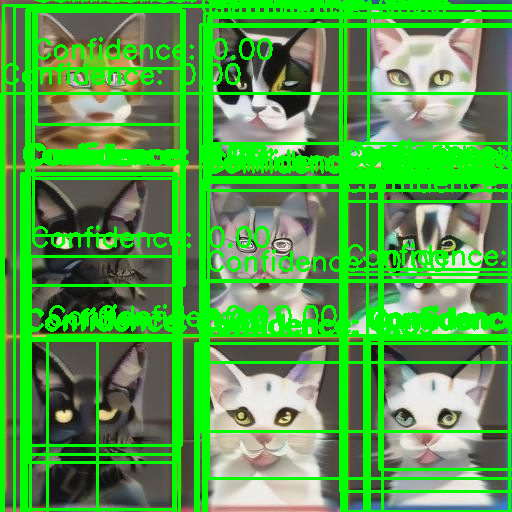

In [43]:
sample_prompt = "cats"
while True:
  response = query(sample_prompt,conf_threshold=0, iou_threshold=0)
  if len(response["scores"])==50:
    break
add_boxes_to_image(get_image_from_b64(response["image"]), response["boxes"], response["scores"])


In [47]:
response['flag']

'gAAAAABnmhkLgd0ZVDFFFOYL5rk_GKi-b22bNu-F4GEnNVg2I6RF07HZpMcsjerNvK5opeB1uTQ2k-WuNWeHMmepLwckklNQ5RUISWNgULSVq9PuBAvpbmb4UUYfLomEQzuL0XKVL3OcIDcZPPEBqz4hZsF3PNxVfUF9pw6qDnwWE4EKnyzfg3hJywj45N1fz5u7Jqom5rVL'

## Submit Flag

When you find the answer, you will get a flag back. It will look something like `gAAAAA ...`.
You can submit it using the code below, or, on the challenge page.

In [48]:
import requests


def submit_flag(flag):
    url = f"{CRUCIBLE_URL}/api/challenges/{CHALLENGE}/submit-flag"
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    payload = {"challenge": CHALLENGE, "flag": flag}
    response = requests.post(url, headers=headers, json=payload)
    if response.status_code == 200:
        if response.json().get("correct") is True:
            print("The flag was correct. Congrats!")
        else:
            print("The flag was incorrect. Keep trying!")
    else:
        print("There was an error submitting your flag")
        print(response.text)


FLAG = response['flag'] # Replace with the flag once you find it
submit_flag(FLAG)

The flag was correct. Congrats!
